要怎麼評斷線性回歸器的性能呢?我們可以拆成獨立不相關的訓練集跟測試集。我們這一次要把所有特徵放下去

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('housing.data', header=None,sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

X = df.iloc[:, :-1].values # 特徵全部下去
y = df['MEDV'].values # 來預測房價
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 按照7:3來分類

In [4]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

接著我們繪製"殘差圖"。垂直軸是預測值扣掉實際值，水平軸是預測值。這樣一來，若圖形離水平軸越遠，代表他是離群值。

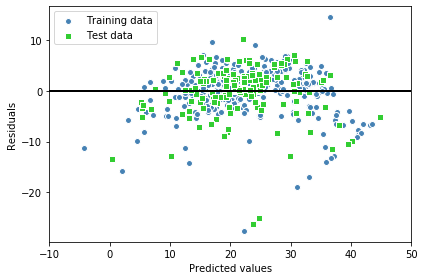

In [5]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()

有一些指標也可以用來量化模型效能，比方說MSE:$$MSE=\frac{1}{N}\sum_{i=1}^N(y^{(i)}-\hat{y}^{(i)})^2$$
或著是$R^2$值，其定義是$$R^2=1-\frac{SSE}{SST}$$
其中SSE稱為"平方誤差和"$$J(\mathbf{w})=\frac{1}{2}\sum_{i=1}^N(y^{(i)}-\hat{y}^{(i)})^2$$
SST稱為總平方和$$SST=\sum_{i=1}^n(y^{(i)}-\mu_y)^2=Var(y)$$

In [6]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196
R^2 train: 0.765, test: 0.673


線性回歸偶爾也會遇上過度適合的問題，我們也可以藉由正規化方法引進一個懲罰項。主要分為以下三種:

1. 里肌回歸(Ridge regression)
$$J(\mathbf{w})=\frac{1}{2}\sum_{i=1}^N(y^{(i)}-\hat{y}^{(i)})^2+\lambda|\mathbf{w}|_2^2$$
2. LASSO(最小絕對壓縮挑選機制)
$$J(\mathbf{w})=\frac{1}{2}\sum_{i=1}^N(y^{(i)}-\hat{y}^{(i)})^2+\lambda|\mathbf{w}|_1$$
此時$m\leq n$，否則只會選$n$個。
3. 彈性網
$$J(\mathbf{w})=\frac{1}{2}\sum_{i=1}^N(y^{(i)}-\hat{y}^{(i)})^2+\lambda_1\sum_{j=1}^mw_j^2+\lambda_2\sum_{j=1}^m|\mathbf{w}_j|_1$$

只示範最常用的LASSO要怎麼用

In [7]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1) # 就是lambda
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_) # 依序列出各個特徵的w值

[-0.11311792  0.04725111 -0.03992527  0.96478874 -0.          3.72289616
 -0.02143106 -1.23370405  0.20469    -0.0129439  -0.85269025  0.00795847
 -0.52392362]


In [8]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 20.926, test: 28.876
R^2 train: 0.753, test: 0.653


其他演算法則如下列程式碼呼叫

In [9]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)